In [1]:
#Import dependencies

#DataFrame and Number imports
import pandas as pd
import numpy as np
#set options
pd.set_option('display.max_columns', 1000)
pd.options.mode.chained_assignment = None

#graph imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#reading in data int DataFrame
train_data = pd.read_csv('train.csv')

#data information - very comprehensive
print(train_data.info())

#head
train_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


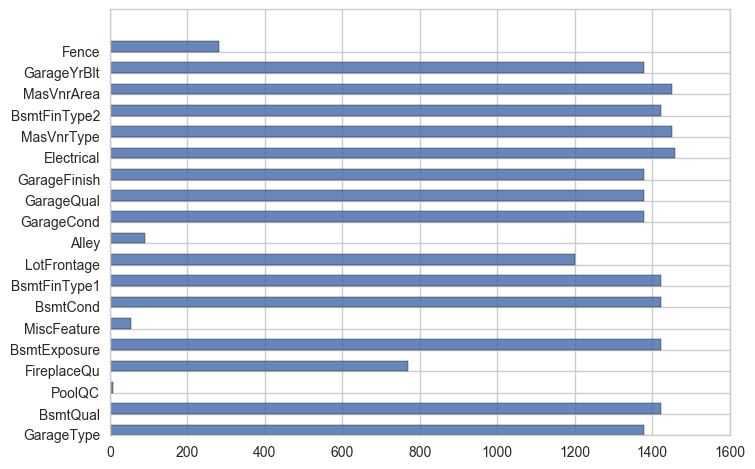

In [3]:
#Missing train_data visualisation
train_missing = {}
for col in train_data.columns:
    if len(train_data[train_data[col].notnull()==True]) < train_data.shape[0]:
        train_missing[col] = len(train_data[train_data[col].notnull()==True])
plt.barh(np.arange(len(train_missing)), train_missing.values(), .5, alpha=0.85)
plt.yticks(np.arange(len(train_missing)), train_missing.keys());plt.title('');plt.show()

In [4]:
#reading in test_data int DataFrame
test_data = pd.read_csv('test.csv')

#data information - very comprehensive
print(test_data.info())

#head
test_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
test_data.shape

(1459, 80)

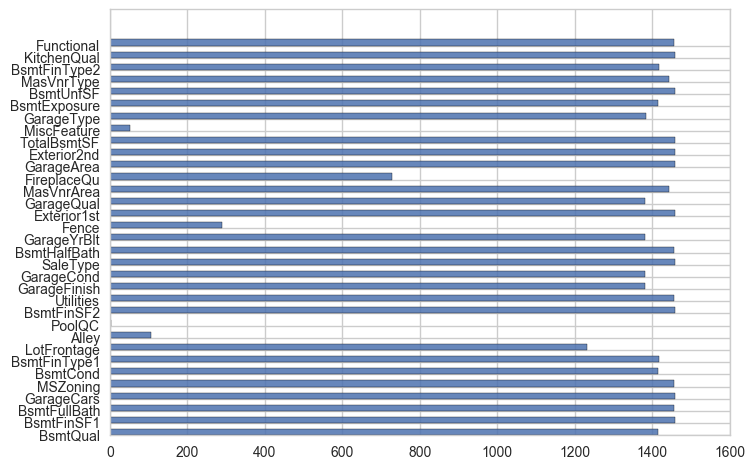

In [6]:
#Missing test_data visualisation
test_missing = {}
for col in test_data.columns:
    if len(test_data[test_data[col].notnull()==True]) < test_data.shape[0]:
        test_missing[col] = len(test_data[test_data[col].notnull()==True])
plt.barh(np.arange(len(test_missing)), test_missing.values(), .5, alpha=0.85)
plt.yticks(np.arange(len(test_missing)), test_missing.keys());plt.title('');plt.show()

_______

##### Findings 🔍   & Food For Thought 🍝

As you can see... there are more missing values in the test data than in the training data. So i think we should concatenate the two data sets and look to treat the missing values all together. 🤔


eg. For ideas such as imputing missing values with the use of machine learning approaches, this will be a better approach.


if we clean in train data and apply in test data, we will see that there are more columns with missing values in the test set, therefore we would not be able to use those variables as accurately/consistently as our training set or in models we've cross validated on our training data. 👍

##### Concat data

In [7]:
# concatenate the two data tables
train_data['dataset'] = 'train'
test_data['dataset'] = 'test'
concat_data = pd.concat([train_data, test_data], axis = 0)
concat_data.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,dataset
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,train
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,train
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,train


In [8]:
concat_data.tail(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,dataset
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,TA,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,2917,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,NaN,0,9,Mitchel,0,7,5,Y,0,NaN,CompShg,Gable,Abnorml,NaN,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006,test
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,NaN,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,970,0,GasA,TA,SFoyer,2918,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,Shed,700,7,Mitchel,32,5,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006,test
1458,996,1004,0,NaN,3,1Fam,TA,Av,758.0,0.0,LwQ,Unf,0.0,0.0,Gd,238.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,NaN,TA,1,PConc,2,Typ,650.0,3.0,TA,Fin,TA,Attchd,1993.0,2000,1,GasA,Ex,2Story,2919,1,TA,Lvl,Mod,9627,Inside,74.0,Reg,0,60,RL,94.0,BrkFace,NaN,0,11,Mitchel,48,5,7,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,9,996.0,AllPub,190,1993,1994,2006,test


Here, I have decided to concatenate the two datatables so that I can have a hollistic view on analysing the data. I will then only train and test the model on the training dataset labelled by the 'dataset' feature. 

In [9]:
concat_data.describe(include='all')

/Users/philipkalinda/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,dataset
count,2919.000000,2919.000000,2919.000000,198,2919.000000,2919,2837,2837,2918.000000,2918.000000,2840,2839,2917.000000,2917.000000,2838,2918.000000,2919,2919,2919,2918,2919.000000,2919,2919,2918,2918,571,1499,2919.000000,2919,2919.000000,2917,2918.000000,2918.000000,2760,2760,2760,2762,2760.000000,2919.000000,2919.000000,2919,2919,2919,2919.000000,2919.000000,2918,2919,2919,2919.000000,2919,2433.000000,2919,2919.000000,2919.000000,2915,2896.000000,2895,105,2919.000000,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919,2919.000000,10,2919,2919,2919,1460.000000,2918,2919.000000,2919,2919.000000,2918.000000,2917,2919.000000,2919.000000,2919.000000,2919.000000,2919
unique,NaN,NaN,NaN,2,NaN,5,4,4,NaN,NaN,6,6,NaN,NaN,4,NaN,2,9,8,5,NaN,5,4,15,16,4,5,NaN,6,NaN,7,NaN,NaN,5,3,5,6,NaN,NaN,NaN,6,5,8,NaN,NaN,4,4,3,NaN,5,NaN,4,NaN,NaN,5,NaN,4,4,NaN,NaN,25,NaN,NaN,NaN,3,NaN,3,8,6,6,NaN,9,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Grvl,NaN,1Fam,TA,No,NaN,NaN,Unf,Unf,NaN,NaN,TA,NaN,Y,Norm,Norm,SBrkr,NaN,TA,TA,VinylSd,VinylSd,MnPrv,Gd,NaN,PConc,NaN,Typ,NaN,NaN,TA,Unf,TA,Attchd,NaN,NaN,NaN,GasA,Ex,1Story,NaN,NaN,TA,Lvl,Gtl,NaN,Inside,NaN,Reg,NaN,NaN,RL,NaN,None,Shed,NaN,NaN,NAmes,NaN,NaN,NaN,Y,NaN,Gd,CompShg,Gable,Normal,NaN,WD,NaN,Pave,NaN,NaN,AllPub,NaN,NaN,NaN,NaN,train
freq,NaN,NaN,NaN,120,NaN,2425,2606,1904,NaN,NaN,851,2493,NaN,NaN,1283,NaN,2723,2511,2889,2671,NaN,2538,1798,1025,1014,329,744,NaN,1308,NaN,2717,NaN,NaN,2654,1230,2604,1723,NaN,NaN,NaN,2874,1493,1471,NaN,NaN,1492,2622,2778,NaN,2133,NaN,1859,NaN,NaN,2265,NaN,1742,95,NaN,NaN,443,NaN,NaN,NaN,2641,NaN,4,2876,2310,2402,NaN,2525,NaN,2907,NaN,NaN,2916,NaN,NaN,NaN,NaN,1460
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,NaN,NaN,441.423235,49.582248,NaN,NaN,0.429894,0.061364,NaN,560.772104,NaN,NaN,NaN,NaN,23.098321,NaN,NaN,NaN,NaN,NaN,NaN,0.597122,NaN,1.568003,NaN,472.874572,1.766621,NaN,NaN,NaN,NaN,1978.113406,1500.759849,0.380267,NaN,NaN,NaN,1460.000000,1.044536,NaN,NaN,NaN,10168.114080,NaN,69.305795,NaN,4.694416,57.137718,NaN,102.201312,NaN,NaN,50.825968,6.213087,NaN,47.486811,5.564577,6.089072,NaN,2.251799,NaN,NaN,NaN,NaN,180921.195890,NaN,16.062350,NaN,6.451524,1051.777587,NaN,93.709832,1971.312778,1984.264474,2007.792737,NaN
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,NaN,NaN,455.610826,169.205611,NaN,NaN,0.524736,0.245687,NaN,439.543659,NaN,NaN,NaN,NaN,64.244246,NaN,NaN,NaN,NaN,NaN,NaN,0.646129,NaN,0.552969,NaN,215.394815,0.761624,NaN,NaN,NaN,NaN,25.574285,506.051045,0.502872,NaN,NaN,NaN,842.787043,0.214462,NaN,NaN,NaN,7886.996359,NaN,23.344905,NaN,46.396825,42.517628,NaN,179.334253,NaN,NaN,567.402211,2.714762,NaN,67.575493,1.113131,1.409947,NaN,35.663946,NaN,NaN,NaN,NaN,79442.502883,NaN,56.184365,NaN,1.569379,440.766258,NaN,126.526589,30.291442,20.894344,1.314964,NaN
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1895.000000,334.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,1300.000000,NaN,21.000000,NaN,0.000000,20.00

In [10]:
concat_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [11]:
continuous_features = ['1stFlrSF', '2ndFlrSF', '3SsnPorch','BedroomAbvGr','BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'BsmtHalfBath',
                       'BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea', 'GarageCars','GarageYrBlt',
                       'GrLivArea','HalfBath','Id', 'KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF', 'MSSubClass',
                       'MasVnrArea','MiscVal', 'MoSold','OpenPorchSF', 'OverallCond', 'OverallQual','PoolArea',
                       'ScreenPorch','TotRmsAbvGrd', 'TotalBsmtSF','WoodDeckSF', 'YearBuilt','YearRemodAdd', 'YrSold']
categorical_features = ['Alley','BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'BsmtQual','CentralAir', 'Condition1', 'Condition2','Electrical','ExterCond', 'ExterQual',
                        'Exterior1st','Exterior2nd', 'Fence', 'FireplaceQu','Foundation','Functional','GarageCond',
                        'GarageFinish', 'GarageQual', 'GarageType','Heating', 'HeatingQC', 'HouseStyle','KitchenQual',
                        'LandContour', 'LandSlope','LotConfig','LotShape','MSZoning','MasVnrType', 'MiscFeature',
                        'Neighborhood','PavedDrive','PoolQC', 'RoofMatl', 'RoofStyle','SaleCondition','SaleType',
                        'Street','Utilities']
target_feature = ['SalePrice']
print('Continuous Features Count: {0}'.format(len(continuous_features)));
print('Categorical Features Count: {0}'.format(len(categorical_features)));
print('Target Feature Count: {0}'.format(len(target_feature)))

Continuous Features Count: 37
Categorical Features Count: 43
Target Feature Count: 1


##### Correlation

In [12]:
continuous_correlation = concat_data.loc[:,continuous_features].fillna(0).corr()
continuous_correlation

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,-0.249823,0.044086,0.108418,0.458206,0.084389,0.257950,0.010462,0.296788,-0.065796,0.407545,0.373077,0.491996,0.440552,0.148152,0.562538,-0.104141,-0.008678,0.076071,0.332460,0.242302,-0.012704,-0.248641,0.392367,0.093062,0.040143,0.238502,-0.157418,0.479152,0.121900,0.098381,0.391782,0.801376,0.227347,0.310814,0.242245,-0.013442
2ndFlrSF,-0.249823,1.000000,-0.032458,0.503506,-0.161997,-0.097654,-0.160956,-0.060133,-0.000032,0.054645,0.169991,0.402865,0.127464,0.181214,0.042505,0.655085,0.611362,-0.022252,0.069032,0.031515,-0.004662,0.017803,0.309309,0.119377,-0.005299,0.014185,0.185387,0.005494,0.245596,0.044503,0.011070,0.584586,-0.204802,0.089922,0.017588,0.158985,-0.019229
3SsnPorch,0.044086,-0.032458,1.000000,-0.048279,0.050934,-0.023268,0.027429,0.026878,-0.005764,-0.032822,0.018852,0.015192,0.029493,0.023444,0.015365,0.006268,-0.023417,-0.046538,-0.021462,0.015995,0.003704,-0.004545,-0.037529,0.014059,-0.000788,0.027391,-0.009392,0.043739,0.018715,-0.006525,-0.029546,-0.025764,0.037940,-0.003935,0.015958,0.037433,0.022560
BedroomAbvGr,0.108418,0.503506,-0.048279,1.000000,-0.113161,-0.031111,-0.155392,0.018689,0.183631,0.049940,0.086793,0.356125,0.073723,0.092655,-0.037582,0.517058,0.245318,0.003074,0.241182,0.132801,0.108014,0.070365,-0.008796,0.078213,0.000245,0.055997,0.086212,-0.008477,0.073075,0.036544,0.007254,0.669737,0.054185,0.031644,-0.053101,-0.021912,-0.020453
BsmtFinSF1,0.458206,-0.161997,0.050934,-0.113161,1.000000,-0.054938,0.639038,0.078500,-0.476771,-0.099575,0.293305,0.081838,0.310219,0.255307,0.125422,0.211980,-0.007058,-0.017203,-0.086271,0.194168,0.069193,-0.065984,-0.064002,0.301537,0.093310,-0.000671,0.124366,-0.050823,0.282150,0.084470,0.096901,0.052629,0.536650,0.223681,0.279780,0.152576,0.022500
BsmtFinSF2,0.084389,-0.097654,-0.023268,-0.031111,-0.054938,1.000000,0.162957,0.099530,-0.238043,0.032775,0.065707,-0.075314,0.003446,-0.014476,0.048742,-0.017747,-0.032368,0.018170,-0.037758,0.084107,-0.004681,-0.004913,-0.072431,-0.014580,-0.005130,-0.009510,-0.005805,0.041359,-0.042605,0.044530,0.063329,-0.048245,0.089561,0.098462,-0.027507,-0.061959,0.008867
BsmtFullBath,0.257950,-0.160956,0.027429,-0.155392,0.639038,0.162957,1.000000,-0.148655,-0.397648,-0.068172,0.169029,-0.019224,0.185151,0.162321,0.063512,0.059333,-0.033582,-0.000318,-0.017810,0.126671,0.021255,-0.047031,0.010436,0.141141,-0.004578,-0.003419,0.079767,-0.042823,0.165060,0.043996,0.053265,-0.039210,0.326252,0.186445,0.211849,0.135150,0.045155
BsmtHalfBath,0.010462,-0.060133,0.026878,0.018689,0.078500,0.099530,-0.148655,1.000000,-0.106840,-0.009613,0.039120,-0.047117,-0.021218,-0.033166,0.001504,-0.044067,-0.058457,0.010243,-0.064878,0.025838,-0.032766,-0.013482,-0.001728,0.016204,0.036917,0.023056,-0.035126,0.083911,-0.040519,0.066860,0.042115,-0.049631,0.012780,0.051665,-0.030171,-0.046167,-0.020055
BsmtUnfSF,0.296788,-0.000032,-0.005764,0.183631,-0.476771,-0.238043,-0.397648,-0.106840,1.000000,0.005162,0.005216,0.273530,0.165014,0.180733,0.014227,0.234388,-0.035459,-0.014790,0.065059,0.021590,0.136565,0.046944,-0.125561,0.088173,-0.010450,0.022954,0.120027,-0.138687,0.275643,-0.032236,-0.049019,0.248015,0.412810,-0.038964,0.130786,0.165770,-0.038073
EnclosedPorch,-0.065796,0.054645,-0.032822,0.049940,-0.099575,0.032775,-0.068172,-0.009613,0.005162,1.000000,0.000971,-0.118983,-0.108382,-0.134863,-0.079578,0.003274,-0.081978,0.021609,0.027639,0.020974,0.023613,0.087212,-0.020867,-0.110614,0.008654,-0.020976,-0.059672,0.071044,-0.139256,0.092534,-0.064377,0.015345,-0.085131,-0.119114,-0.374073,-0.220456,-0.001134


In [13]:
# only 1 perfect correlation for each, meaning i can replace them to get maxs
# how many perfect and no correlations are there in the continuous features?
continuous_correlation.apply(lambda x: (sum([1 for i in x if i==1]),sum([1 for i in x if i==0])))

1stFlrSF         (1, 0)
2ndFlrSF         (1, 0)
3SsnPorch        (1, 0)
BedroomAbvGr     (1, 0)
BsmtFinSF1       (1, 0)
BsmtFinSF2       (1, 0)
BsmtFullBath     (1, 0)
BsmtHalfBath     (1, 0)
BsmtUnfSF        (1, 0)
EnclosedPorch    (1, 0)
Fireplaces       (1, 0)
FullBath         (1, 0)
GarageArea       (1, 0)
GarageCars       (1, 0)
GarageYrBlt      (1, 0)
GrLivArea        (1, 0)
HalfBath         (1, 0)
Id               (1, 0)
KitchenAbvGr     (1, 0)
LotArea          (1, 0)
LotFrontage      (1, 0)
LowQualFinSF     (1, 0)
MSSubClass       (1, 0)
MasVnrArea       (1, 0)
MiscVal          (1, 0)
MoSold           (1, 0)
OpenPorchSF      (1, 0)
OverallCond      (1, 0)
OverallQual      (1, 0)
PoolArea         (1, 0)
ScreenPorch      (1, 0)
TotRmsAbvGrd     (1, 0)
TotalBsmtSF      (1, 0)
WoodDeckSF       (1, 0)
YearBuilt        (1, 0)
YearRemodAdd     (1, 0)
YrSold           (1, 0)
dtype: object

In [14]:
continuous_correlation.replace(1,0).idxmax().head()
continuous_correlation.replace(1,0).idxmin().head()

1stFlrSF            2ndFlrSF
2ndFlrSF            1stFlrSF
3SsnPorch       BedroomAbvGr
BedroomAbvGr    BsmtFullBath
BsmtFinSF1         BsmtUnfSF
dtype: object

In [15]:
cont_corr = continuous_correlation.copy()
cont_corr['highest_correlation'] = continuous_correlation.replace(1,0).idxmax()
cont_corr['lowest_correlation'] = continuous_correlation.replace(1,0).idxmin()
cont_corr['highest_correlation_value'] = continuous_correlation.replace(1,0).max()
cont_corr['lowest_correlation_value'] = continuous_correlation.replace(1,0).min()

In [16]:
continuous_correlation.replace(1,0)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,0.000000,-0.249823,0.044086,0.108418,0.458206,0.084389,0.257950,0.010462,0.296788,-0.065796,0.407545,0.373077,0.491996,0.440552,0.148152,0.562538,-0.104141,-0.008678,0.076071,0.332460,0.242302,-0.012704,-0.248641,0.392367,0.093062,0.040143,0.238502,-0.157418,0.479152,0.121900,0.098381,0.391782,0.801376,0.227347,0.310814,0.242245,-0.013442
2ndFlrSF,-0.249823,0.000000,-0.032458,0.503506,-0.161997,-0.097654,-0.160956,-0.060133,-0.000032,0.054645,0.169991,0.402865,0.127464,0.181214,0.042505,0.655085,0.611362,-0.022252,0.069032,0.031515,-0.004662,0.017803,0.309309,0.119377,-0.005299,0.014185,0.185387,0.005494,0.245596,0.044503,0.011070,0.584586,-0.204802,0.089922,0.017588,0.158985,-0.019229
3SsnPorch,0.044086,-0.032458,0.000000,-0.048279,0.050934,-0.023268,0.027429,0.026878,-0.005764,-0.032822,0.018852,0.015192,0.029493,0.023444,0.015365,0.006268,-0.023417,-0.046538,-0.021462,0.015995,0.003704,-0.004545,-0.037529,0.014059,-0.000788,0.027391,-0.009392,0.043739,0.018715,-0.006525,-0.029546,-0.025764,0.037940,-0.003935,0.015958,0.037433,0.022560
BedroomAbvGr,0.108418,0.503506,-0.048279,0.000000,-0.113161,-0.031111,-0.155392,0.018689,0.183631,0.049940,0.086793,0.356125,0.073723,0.092655,-0.037582,0.517058,0.245318,0.003074,0.241182,0.132801,0.108014,0.070365,-0.008796,0.078213,0.000245,0.055997,0.086212,-0.008477,0.073075,0.036544,0.007254,0.669737,0.054185,0.031644,-0.053101,-0.021912,-0.020453
BsmtFinSF1,0.458206,-0.161997,0.050934,-0.113161,0.000000,-0.054938,0.639038,0.078500,-0.476771,-0.099575,0.293305,0.081838,0.310219,0.255307,0.125422,0.211980,-0.007058,-0.017203,-0.086271,0.194168,0.069193,-0.065984,-0.064002,0.301537,0.093310,-0.000671,0.124366,-0.050823,0.282150,0.084470,0.096901,0.052629,0.536650,0.223681,0.279780,0.152576,0.022500
BsmtFinSF2,0.084389,-0.097654,-0.023268,-0.031111,-0.054938,0.000000,0.162957,0.099530,-0.238043,0.032775,0.065707,-0.075314,0.003446,-0.014476,0.048742,-0.017747,-0.032368,0.018170,-0.037758,0.084107,-0.004681,-0.004913,-0.072431,-0.014580,-0.005130,-0.009510,-0.005805,0.041359,-0.042605,0.044530,0.063329,-0.048245,0.089561,0.098462,-0.027507,-0.061959,0.008867
BsmtFullBath,0.257950,-0.160956,0.027429,-0.155392,0.639038,0.162957,0.000000,-0.148655,-0.397648,-0.068172,0.169029,-0.019224,0.185151,0.162321,0.063512,0.059333,-0.033582,-0.000318,-0.017810,0.126671,0.021255,-0.047031,0.010436,0.141141,-0.004578,-0.003419,0.079767,-0.042823,0.165060,0.043996,0.053265,-0.039210,0.326252,0.186445,0.211849,0.135150,0.045155
BsmtHalfBath,0.010462,-0.060133,0.026878,0.018689,0.078500,0.099530,-0.148655,0.000000,-0.106840,-0.009613,0.039120,-0.047117,-0.021218,-0.033166,0.001504,-0.044067,-0.058457,0.010243,-0.064878,0.025838,-0.032766,-0.013482,-0.001728,0.016204,0.036917,0.023056,-0.035126,0.083911,-0.040519,0.066860,0.042115,-0.049631,0.012780,0.051665,-0.030171,-0.046167,-0.020055
BsmtUnfSF,0.296788,-0.000032,-0.005764,0.183631,-0.476771,-0.238043,-0.397648,-0.106840,0.000000,0.005162,0.005216,0.273530,0.165014,0.180733,0.014227,0.234388,-0.035459,-0.014790,0.065059,0.021590,0.136565,0.046944,-0.125561,0.088173,-0.010450,0.022954,0.120027,-0.138687,0.275643,-0.032236,-0.049019,0.248015,0.412810,-0.038964,0.130786,0.165770,-0.038073
EnclosedPorch,-0.065796,0.054645,-0.032822,0.049940,-0.099575,0.032775,-0.068172,-0.009613,0.005162,0.000000,0.000971,-0.118983,-0.108382,-0.134863,-0.079578,0.003274,-0.081978,0.021609,0.027639,0.020974,0.023613,0.087212,-0.020867,-0.110614,0.008654,-0.020976,-0.059672,0.071044,-0.139256,0.092534,-0.064377,0.015345,-0.085131,-0.119114,-0.374073,-0.220456,-0.001134


In [17]:
#continuous variables correlation with additional columns for highest and lowest correlated features as well
cont_corr.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,highest_correlation,lowest_correlation,highest_correlation_value,lowest_correlation_value
1stFlrSF,1.000000,-0.249823,0.044086,0.108418,0.458206,0.084389,0.257950,0.010462,0.296788,-0.065796,0.407545,0.373077,0.491996,0.440552,0.148152,0.562538,-0.104141,-0.008678,0.076071,0.332460,0.242302,-0.012704,-0.248641,0.392367,0.093062,0.040143,0.238502,-0.157418,0.479152,0.121900,0.098381,0.391782,0.801376,0.227347,0.310814,0.242245,-0.013442,TotalBsmtSF,2ndFlrSF,0.801376,-0.249823
2ndFlrSF,-0.249823,1.000000,-0.032458,0.503506,-0.161997,-0.097654,-0.160956,-0.060133,-0.000032,0.054645,0.169991,0.402865,0.127464,0.181214,0.042505,0.655085,0.611362,-0.022252,0.069032,0.031515,-0.004662,0.017803,0.309309,0.119377,-0.005299,0.014185,0.185387,0.005494,0.245596,0.044503,0.011070,0.584586,-0.204802,0.089922,0.017588,0.158985,-0.019229,GrLivArea,1stFlrSF,0.655085,-0.249823
3SsnPorch,0.044086,-0.032458,1.000000,-0.048279,0.050934,-0.023268,0.027429,0.026878,-0.005764,-0.032822,0.018852,0.015192,0.029493,0.023444,0.015365,0.006268,-0.023417,-0.046538,-0.021462,0.015995,0.003704,-0.004545,-0.037529,0.014059,-0.000788,0.027391,-0.009392,0.043739,0.018715,-0.006525,-0.029546,-0.025764,0.037940,-0.003935,0.015958,0.037433,0.022560,BsmtFinSF1,BedroomAbvGr,0.050934,-0.048279
BedroomAbvGr,0.108418,0.503506,-0.048279,1.000000,-0.113161,-0.031111,-0.155392,0.018689,0.183631,0.049940,0.086793,0.356125,0.073723,0.092655,-0.037582,0.517058,0.245318,0.003074,0.241182,0.132801,0.108014,0.070365,-0.008796,0.078213,0.000245,0.055997,0.086212,-0.008477,0.073075,0.036544,0.007254,0.669737,0.054185,0.031644,-0.053101,-0.021912,-0.020453,TotRmsAbvGrd,BsmtFullBath,0.669737,-0.155392
BsmtFinSF1,0.458206,-0.161997,0.050934,-0.113161,1.000000,-0.054938,0.639038,0.078500,-0.476771,-0.099575,0.293305,0.081838,0.310219,0.255307,0.125422,0.211980,-0.007058,-0.017203,-0.086271,0.194168,0.069193,-0.065984,-0.064002,0.301537,0.093310,-0.000671,0.124366,-0.050823,0.282150,0.084470,0.096901,0.052629,0.536650,0.223681,0.279780,0.152576,0.022500,BsmtFullBath,BsmtUnfSF,0.639038,-0.476771


In [18]:
# categorical data head
concat_data.loc[:,categorical_features].head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,NaN,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,NaN,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [19]:
concat_data.loc[:,categorical_features].describe()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
count,198,2919,2837,2837,2840,2839,2838,2919,2919,2919,2918,2919,2919,2918,2918,571,1499,2919,2917,2760,2760,2760,2762,2919,2919,2919,2918,2919,2919,2919,2919,2915,2895,105,2919,2919,10,2919,2919,2919,2918,2919,2917
unique,2,5,4,4,6,6,4,2,9,8,5,5,4,15,16,4,5,6,7,5,3,5,6,6,5,8,4,4,3,5,4,5,4,4,25,3,3,8,6,6,9,2,2
top,Grvl,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,Shed,NAmes,Y,Gd,CompShg,Gable,Normal,WD,Pave,AllPub
freq,120,2425,2606,1904,851,2493,1283,2723,2511,2889,2671,2538,1798,1025,1014,329,744,1308,2717,2654,1230,2604,1723,2874,1493,1471,1492,2622,2778,2133,1859,2265,1742,95,443,2641,4,2876,2310,2402,2525,2907,2916


In [20]:
print(concat_data.shape);print(train_data.shape);print(test_data.shape)

(2919, 82)
(1460, 82)
(1459, 81)


In [37]:
for col in categorical_features:
    print(('*'*40)+'\n'+'Column: {0}'.format(col))
    unique_values = concat_data.loc[:,col].unique()
    print('Counts')
    print('\t{} - {} - £{:0.2f}'.format('NA Values',
                                        len(concat_data.loc[:,col][concat_data.loc[:,col].isnull()==True]),
                                        np.mean(concat_data.SalePrice[(concat_data.loc[:,col].isnull()==True)&(concat_data.SalePrice.notnull()==True)])))
    for unq in unique_values:
        print('\t{} - {} - £{:0.2f}'.format(unq,
                                            len(concat_data.loc[:,col][concat_data.loc[:,col]==unq]),
                                            np.mean(concat_data.SalePrice[(concat_data.loc[:,col]==unq)&(concat_data.SalePrice.notnull()==True)])))

****************************************
Column: Alley
Counts
	NA Values - 2721 - £183452.13
	nan - 0 - £nan
	Grvl - 120 - £122219.08
	Pave - 78 - £168000.59
****************************************
Column: BldgType
Counts
	NA Values - 0 - £nan
	1Fam - 2425 - £185763.81
	2fmCon - 62 - £128432.26
	Duplex - 109 - £133541.08
	TwnhsE - 227 - £181959.34
	Twnhs - 96 - £135911.63
****************************************
Column: BsmtCond
Counts
	NA Values - 82 - £105652.89
	TA - 2606 - £183632.62
	Gd - 122 - £213599.91
	nan - 0 - £nan
	Fa - 104 - £121809.53
	Po - 5 - £64000.00
****************************************
Column: BsmtExposure
Counts
	NA Values - 82 - £107938.34
	No - 1904 - £165652.30
	Gd - 276 - £257689.81
	Mn - 239 - £192789.66
	Av - 418 - £206643.42
	nan - 0 - £nan
****************************************
Column: BsmtFinType1
Counts
	NA Values - 79 - £105652.89
	GLQ - 849 - £235413.72
	ALQ - 429 - £161573.07
	Unf - 851 - £170670.58
	Rec - 288 - £146889.25
	BLQ - 269 - £149493.66

In [27]:
concat_data.SalePrice[concat_data['dataset']=='test']

Series([], Name: SalePrice, dtype: int64)